In [34]:
# basics
import pandas as pd
import numpy as np

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# imbalance class control
from imblearn.over_sampling import SMOTE

# Cross Validating
from sklearn.model_selection import train_test_split, cross_val_score

# models to try
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor

# model evaluation
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
df = pd.read_csv('data/taskrabbitdata.csv')

In [36]:
model_data = df[['position', 'hourly_rate', 'num_completed_tasks', 'hired']].dropna()

In [37]:
# Separate input features and target
y = model_data.hired
X = model_data.drop('hired', axis=1)

# # setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [40]:
smote = GradientBoostingRegressor().fit(X_train, y_train)

smote_pred = smote.predict(X_test)

# # Checking accuracy
# accuracy_score(y_test, smote_pred)

In [42]:
# recall_score(y_test, smote_pred)

In [28]:
# confustion matrix
pd.DataFrame(confusion_matrix(y_test, smote_pred))

,0,1
0,4663,2409
1,123,305


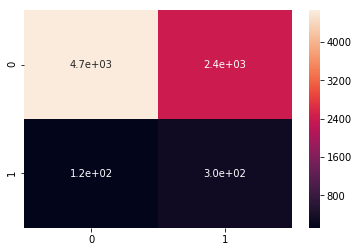

In [27]:
# Evaluating on y_test
cm = confusion_matrix(y_test, smote_pred)
sns.heatmap(cm, annot= True)

#### Partial Dependence Plots

<Figure size 1440x1440 with 0 Axes>

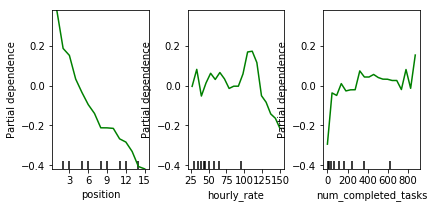

In [50]:
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
plt.figure(figsize = (20, 20))
my_plots = plot_partial_dependence(smote,       
                                   features=[0, 1, 2], # column numbers of plots we want to show
                                   X=X,            # raw predictors data.
                                   feature_names=['position', 'hourly_rate', 'num_completed_tasks'], # labels on graphs
                                   grid_resolution=20) # number of values to plot on x axis